In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [4]:
max_frame_no = 200
N0_particles = 100

In [17]:
# load deposit_dict.pkl to extract time steps with deposits
path = f'lineplume_sims_3D/temp/'

trajectories = {pid: [] for pid in range(50)}

for i in range(1, max_frame_no + 1):
    file_path = os.path.join(path, f'frame_{i}.npy')
    if os.path.exists(file_path):
        # Load the data from the file
        data = np.load(file_path)

        
        # Create a set of particle IDs in this frame for quick lookup
        current_particles = set(data[:, 0])

        # Extract data for each particle of interest
        for pid in range(30):
            # pid = float(pid)
            if pid in current_particles:
                # Find the index of the particle in the current frame
                index = np.where(data[:, 0] == pid)[0][0]

                # Append the particle's data (excluding the ID) to its trajectory
                trajectories[pid].append(data[index, 1:4])
            else:
                # Append None or numpy.nan to indicate missing particle in this frame
                trajectories[pid].append(None)


plotting trajectories colored by particle

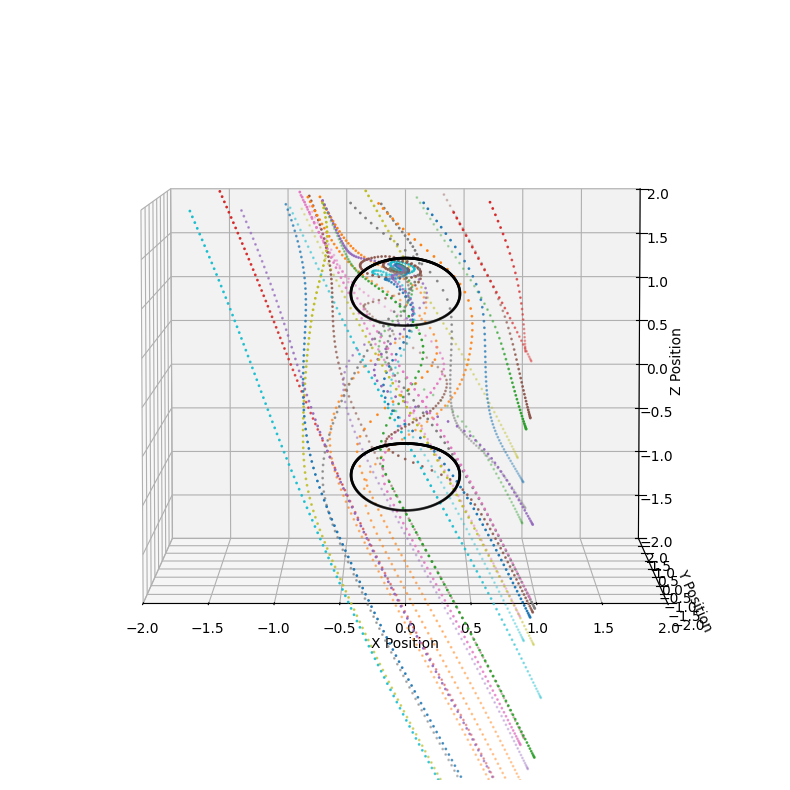

In [18]:
from matplotlib.path import Path
path = 'velocity_fields/alpha_0.4_2D/'


geometry_2D = np.load(path + 'geometry.npy')

x_core_2d, y_core_2d, y_core_lower_2d, _, _ = geometry_2D.T

# target_bubbles = [1.0]

# Create a new figure for plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# # Plot each trajectory
for pid, trajectory in trajectories.items():
    
    # if pid in target_bubbles:
        # trajectory = trajectories[pid]
        # Extract x, y, z coordinates, handling None values
        x_coords = [point[0] if point is not None else np.nan for point in trajectory]
        y_coords = [point[1] if point is not None else np.nan for point in trajectory]
        z_coords = [point[2] if point is not None else np.nan for point in trajectory]

        # Plot the trajectory
        ax.scatter(x_coords, y_coords, z_coords, s=1)

ax.scatter(x_core_2d, np.zeros(len(x_core_2d)), y_core_2d, s=1, color='black')
ax.scatter(x_core_2d, np.zeros(len(x_core_2d)), y_core_lower_2d, s=1,color= 'black')

# Labels and legend
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.view_init(elev=5, azim=270)

# Show the plot
plt.show()




plotting trajectory colored by time

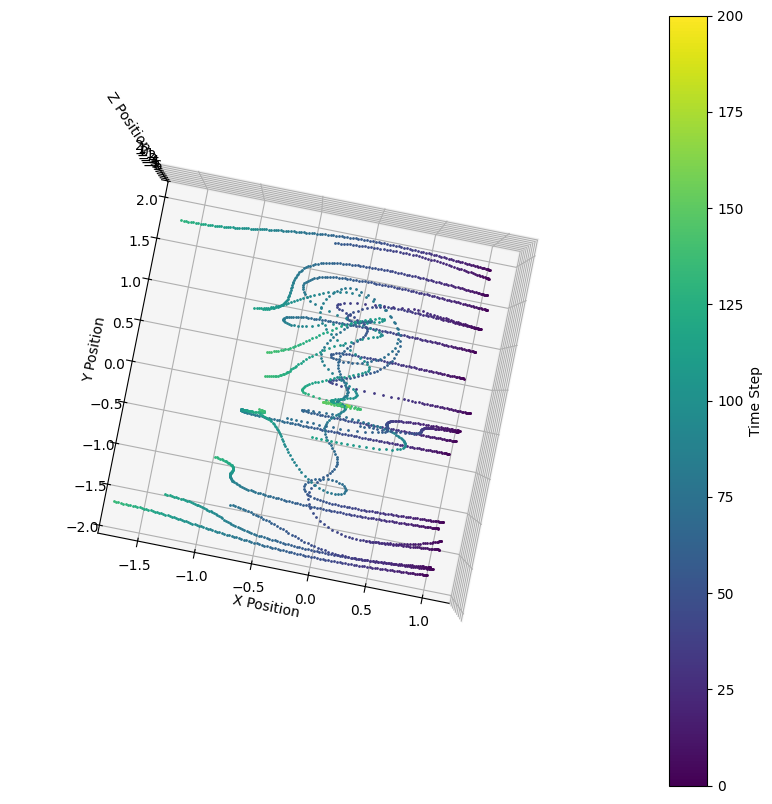

In [6]:
# Create a new figure for plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


# Colormap and normalization
cmap = plt.cm.viridis
norm = plt.Normalize(0, max_frame_no)

# Plot each trajectory
for pid, trajectory in trajectories.items():
    for i, point in enumerate(trajectory):
        if point is None:
            break  # Stop plotting as soon as a None is encountered
        ax.scatter(point[0], point[1], point[2], color=cmap(norm(i)), s=1)  # Increase size for better visibility

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.view_init(elev=90, azim=280)

# Adding a color bar to indicate the time step
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('Time Step')

# Show the plot
plt.show()